In [1]:
# Datos
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_app = pd.read_csv("./dataset/googleplaystore.csv")
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Eliminamos filas duplicadas.
df_app.drop_duplicates(inplace=True)

# Analisis exploratorio de datos

Tipos de datos de cada columna del DataFrame deberían ser los siguientes:

- `App`: object (cadena de texto)
- `Category`: object (cadena de texto)
- `Rating`: int32 (número entero): Calificación general de los usuarios de la aplicación -> [0, 1, 2, 3, 4, 5]
- `Reviews`: int64 (número entero)
- `Size`: int (número entero) unidad (k)
- `Installs`: int64 (número entero)
- `Type`: object (cadena de texto)
- `Price`: float32 (número flotante)
- `Content Rating`: object (cadena de texto)
- `Genres`: object (cadena de texto)
- `Last Updated`: datetime64[ns] (fecha y hora)
- `Current Ver`: object (cadena de texto)
- `Android Ver`: object (cadena de texto)

In [4]:
# Información del dataset.
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Calcular el número de NaN por columna
nan_count = df_app.isnull().sum()

# Mostrar solo las columnas con más de cero NaN
print(nan_count[nan_count > 0])

Rating            1465
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64


# Analizamos los tipos de datos

In [6]:
# Borramos la fila que contine el valor 1.9 en la columna Category
df_app = df_app[df_app.Category != '1.9']

## Columna `Category`

In [7]:
# La variable "Category", la consideramos como categórica. Con esto nos ahorraremos un poco de memoria.
print("Cantidad de caterias en 'Category':", df_app["Category"].value_counts().count())
df_app["Category"] = df_app["Category"].astype("category")

Cantidad de caterias en 'Category': 33


## Columna `Rating`

In [8]:
df_app['Rating'] = df_app['Rating'].astype("float32")

## Columna `Rewiers`

In [9]:
# La variable "Reviews" la consideramos como numérica.
df_app["Reviews"] = df_app["Reviews"].astype('int32')

## Columna `Size`

In [10]:
# Reemplazamos los "Varies with device" por 0.
df_app["Size"] = df_app["Size"].replace("Varies with device", 0)    

In [11]:
# Quitamos la letra "M" y "k" de la columna "Size" y lo convertimos a float. Nos quedamos con unidad de medida: M = Mega.
def convert_to_m(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('M', ''))
        elif 'k' in value:
            return float(value.replace('k', '')) / 1000
    return float(value) / 1000000

df_app['Size'] = df_app['Size'].apply(convert_to_m)

In [12]:
df_app["Size"] = df_app["Size"].astype("float32")   # La variable "Size" la consideramos como numérica.

## Columna `Installs`

In [13]:
# Cramos una funcion para quitar las comas y el simbolo * de la columna "Installs".
def convert_to_int(value):
    if isinstance(value, str):
        return int(value.replace(',', '').replace('+', ''))
    return int(value)

df_app['Installs'] = df_app['Installs'].apply(convert_to_int)


## Columna `Type`

In [14]:
df_app["Type"].value_counts()
df_app["Type"] = df_app["Type"].astype("category")   # La variable "Type" la consideramos como categórica.

## Columna `Price`

In [15]:
# La columna "Price" es de tipo object, pero tiene valores numéricos y letras ($). Eliminos el signo "$" y la convertimos a numérica.
df_app["Price"] = df_app["Price"].astype("str").str.replace("$", "")

# La variable "Price" la consideramos como numérica.
df_app["Price"] = df_app["Price"].astype("str").astype("float32")

## Columna `Content Rating`

In [16]:
df_app["Content Rating"].value_counts()

Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

## Columna `Genres`

In [17]:
a = df_app["Genres"].value_counts();
print("cantidad de generos:", a.count())

cantidad de generos: 119


In [18]:
# La variable "Genres" contine varios generos separados por ";" o "&".
# Con esto buscamos en las categorias.
mask = a.index.str.contains("Strategy")
result = a[mask]
print(result)

Genres
Strategy                       105
Strategy;Action & Adventure      2
Strategy;Education               1
Strategy;Creativity              1
Name: count, dtype: int64


## Columna `Last Updated` (fecha)

In [19]:
# Convertir la columna 'fecha' a tipo fecha
df_app['Last Updated'] = pd.to_datetime(df_app['Last Updated'])

## Columna Android Ver

In [20]:
df_app["Android Ver"].value_counts().count()

33

# Primera parte - Visualización de Dato

### Histograma.

**Regla de Sturges**
Una de las reglas prácticas acerca del número de clases que deben considerar al elaborarse un histograma.
Este número viene dado por la siguiente expresión:

$$ c=1+\log_{2}(M) \quad \text{donde M es el tamaño de la muestra.}$$



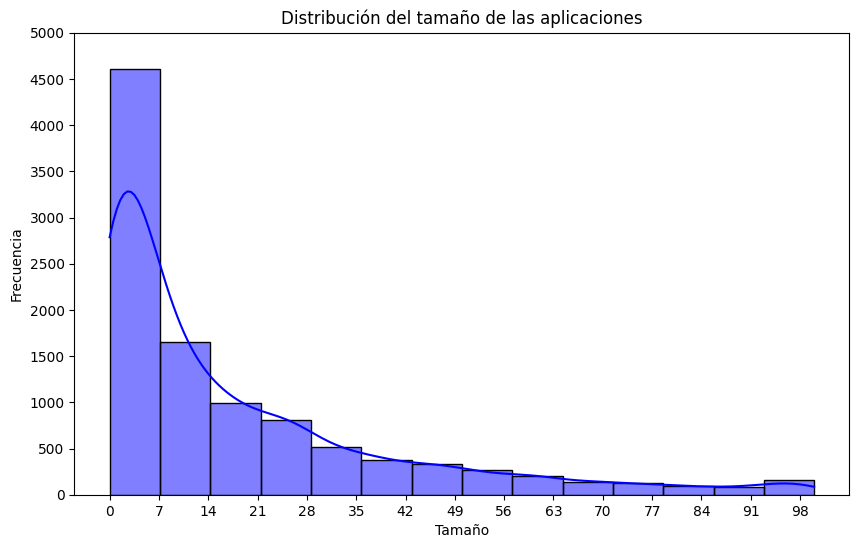

In [21]:
# Hacemos un hstogram de la variable "Reviews". Colocamos 14 bins.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_app, x="Size", bins=14, kde=True, color="blue")
plt.title("Distribución del tamaño de las aplicaciones")
plt.xlabel("Tamaño")
plt.ylabel("Frecuencia")
plt.xticks(range(0, 100, 7))
plt.yticks(range(0, 5001, 500))
plt.show()


### Boxplot

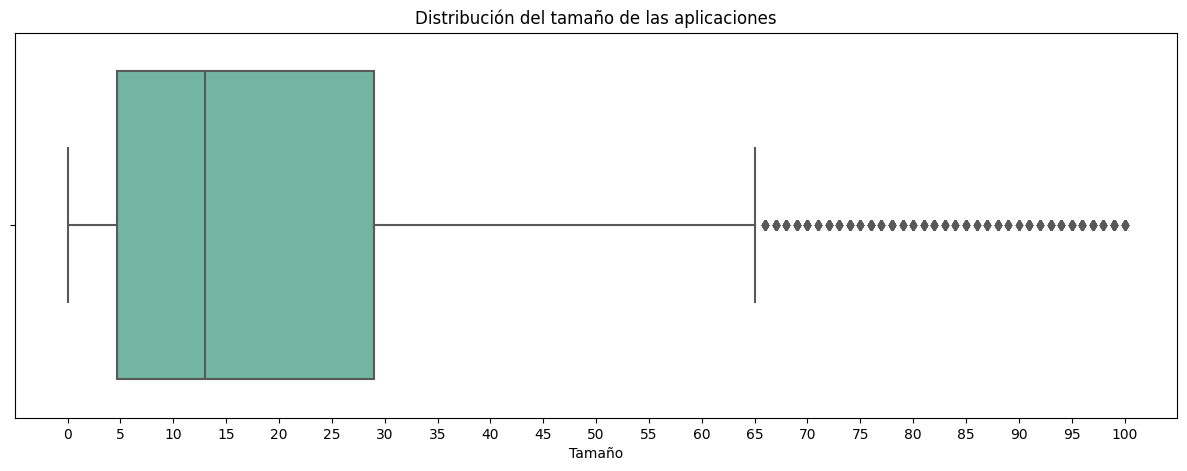

In [22]:
# Para identificar la presencia de valores atípicos.
plt.figure(figsize=(15,5))
sns.boxplot(data=df_app[df_app["Size"] != 0], x='Size', palette='Set2')
plt.title("Distribución del tamaño de las aplicaciones")
plt.xlabel("Tamaño")
plt.xticks(range(0, 101, 5))
plt.show()

### Heatmap 

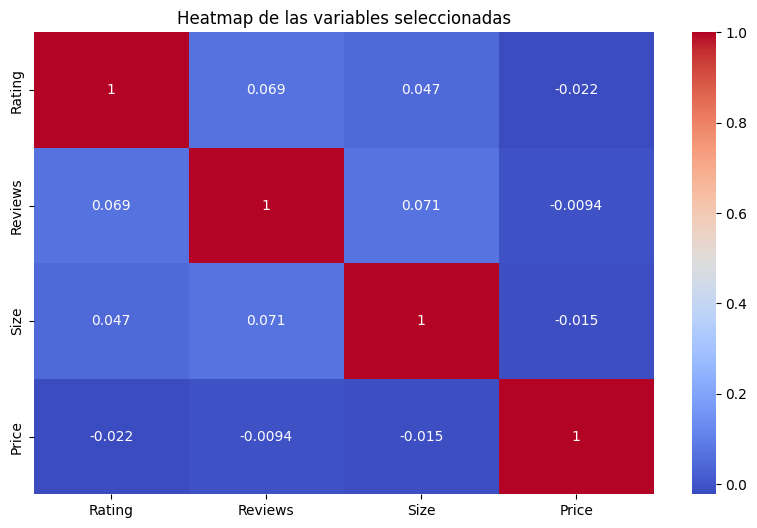

In [23]:
# Seleccionamos la variables para hacer un heatmap.
df_heatmap = df_app[["Rating", "Reviews", "Size", "Price"]].corr(method="pearson")

# Hacemos un heatmap de las variables seleccionadas.
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm")
plt.title("Heatmap de las variables seleccionadas")
plt.show()


# Pandas (⭐)

### 9) ¿Cuál es la aplicación que generó más dinero? (⭐)

In [24]:
# Cuál es la aplicación que generó más dinero
df_app["Revenue"] = df_app["Price"] * df_app["Installs"]
df_app["Revenue"].max()
# mostramos el nombre de la app que generó más dinero.
df_app[df_app["Revenue"] == df_app["Revenue"].max()]["App"]


2241    Minecraft
4347    Minecraft
Name: App, dtype: object

### 11) ¿Cuál es la aplicación con mayor promedio de score de sentimiento subjetivo? (⭐)

In [25]:
df_reviews  = pd.read_csv("./dataset/googleplaystore_user_reviews.csv")
df_reviews .head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [26]:
df_reviews .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [27]:
# aplicación con mayor promedio de score de sentimiento subjetivo
df_reviews .groupby("App")["Sentiment_Subjectivity"].mean().sort_values(
    ascending=False).head(1)


App
Google Slides    0.916667
Name: Sentiment_Subjectivity, dtype: float64

# Pandas (⭐⭐)

### 24) Indica las 10 apps de categoría Sport con sentimiento positivo y mayor rating.(⭐⭐)

In [28]:
df_sport = df_app[df_app["Category"] == "SPORTS"][["App","Rating"]] # Filtramos por "Category" = "SPORTS".
df_positive_reviews = df_reviews[df_reviews['Sentiment'] == 'Positive']["App"]  # Filtramos por "Sentiment" = "Positive".

data_inner = pd.merge(df_sport, df_positive_reviews,on = "App", how = "inner") # Hacemos un merge de los dos dataframes, sobre la columna "App" y "inner" = interseccion.

data_inner.drop_duplicates(inplace=True)    # Eliminamos los duplicados.
data_inner.sort_values(by="Rating", ascending=False).head(10)   # Mostramos los 10 primeros.

,App,Rating
1419,Dream League Soccer 2018,4.6
997,FanDuel: Daily Fantasy Sports,4.6
921,Golf GPS Rangefinder: Golf Pad,4.6
829,Golf GPS by SwingxSwing,4.6
1109,850 Sports News Digest,4.6
584,All Football - Latest News & Videos,4.6
1147,365Scores - Live Scores,4.6
654,"All Football GO- Live Score, Games",4.6
800,"GolfNow: Tee Time Deals at Golf Courses, Golf GPS",4.5
1157,Cricbuzz - Live Cricket Scores & News,4.5


### 28) Calcule el tamaño promedio de las aplicaciones por versión de Android, sin tener en cuenta las aplicaciones que varían en tamaño según dispositivo. (⭐⭐)

In [29]:
# Se reemplazamos los "Varies with device" por 0, cuando analize los tipos de datos.
df_app[df_app["Size"] != 0].groupby("Android Ver")[["Size"]].mean().head()


,Size
Android Ver,
1.0 and up,3.855500
1.5 and up,5.071631
1.6 and up,3.119138
2.0 and up,6.256806
2.0.1 and up,22.222141


### 36) Devolver las categorías que tengan una app dominante de nivel K. Una app es dominante a nivel K si la cantidad de descargas es mayor al número de de descarga de las k siguientes apps ordenadas según el número de descargas. (⭐⭐)

In [30]:
def categorias_con_apps_dominantes(df, k):
    # Agrupar el DataFrame por categoría y ordenar por el número de descargas
    df = df.sort_values('Installs', ascending=False).groupby('Category')
    
    # Crear un diccionario vacío para almacenar las categorías y sus apps dominantes de nivel K
    categorias = {}
    
    # Iterar sobre cada grupo (categoría)
    for categoria, grupo in df:
        # Crear una lista vacía para almacenar las apps dominantes de nivel K en esta categoría
        apps_dominantes = []
        
        # Iterar sobre cada aplicación en el grupo
        for i in range(len(grupo)):
            # Verificar si la aplicación tiene más descargas que la aplicación en la posición i + k
            if i + k < len(grupo) and grupo.iloc[i]['Installs'] > grupo.iloc[i + k]['Installs']:
                # Si es así, agregar la aplicación a la lista de apps dominantes de nivel K
                apps_dominantes.append(grupo.iloc[i]['App'])
        
        # Si hay apps dominantes de nivel K en esta categoría, agregar la categoría y sus apps al diccionario
        if apps_dominantes:
            categorias[categoria] = apps_dominantes
    
    return categorias

In [31]:
# Elegi el valor de k = 500, porque es el valor que mas me gusto.
K = 500
categorias_con_apps_dominantes(df_app, K).keys()

dict_keys(['FAMILY', 'GAME', 'TOOLS'])